<a href="https://colab.research.google.com/github/thammarat-ai/introAI/blob/main/2introCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to Computer Vision
ตัวอย่างเครื่องแต่งกายที่จะจดจำ

<img src="https://www.oreilly.com/library/view/ai-and-machine/9781492078180/assets/aiml_0201.png">

ลองคิดนะ ว่าเราจะบอกอธิบาย เสื้อผ้า ให้คนที่ไม่เห็น รู้ได้อย่างไร
ว่าอะไรคือเสื้อยืด เสื้อเชิ๊ต ชุดเดรส กระเป๋า รองเท้าผ้าใบ รองเท้าส้นสูง


นี่เป็นอีกหนึ่งตัวอย่างถ้าใช้ rules-based programming ก็จะซับซ้อนมากๆ หรือไม่เป็นไม่ได้ที่จะเขียนคำสั่งให้ครอบคลุมทุกเงื่อนไข

วิธีที่เรารู้จักเครื่องแต่งกาย เราก็รู้เพราะเราเห็นมันมากเยอะ มีคนมาสอนว่าอันนี้เรียกว่ากระเป๋านะ ถูกพ่อแม่ พี่น้องสอนมาตั้งแต่เด็กๆ จนตอนนี้เรารู้จักและบอกชนิดได้ด้วยตัวเอง

คอมพิวเตอร์ก็เช่นกัน ขั้นตอนก็คล้ายๆ กันกับที่เราเรียนรู้ แต่ว่าคอมพิวเตอร์มีข้อจำกัด อย่างไรสมองคนก็มีความซับซ้อนมากกว่า

ไฟล์นี้จะมาเบื้องต้นของ Computer Vision (CV)
จะสอนให้คอมรู้จักเสื้อผ้า 

จะใช้ dataset ชื่อ Fashion MNIST




##The Data: Fashion MNIST

dataset สำหรับเรียนรู้ซ้อมมือหรือเปรียบเทียบประสิทธิภาพอัลกอริทึม คือ
Modified National Institute of Standards and Technology (MNIST) database
ประกอบด้วยภาพตัวเลขลายมือ 70,000 ของเลข 0 - 9 
เป็นภาพขาวดำ 28 x 28

ส่วน Fashion MNIST ออกแบบเลียนแบบ MNIST ด้วยจำนวนแทนกัน แล้วตัวเลข 0 - 9 เหมือนกัน แต่จะแทนด้วยเสื้อผ้าที่แตกต่างกัน 10 ชนิด

<img src="https://www.oreilly.com/library/view/ai-and-machine/9781492078180/assets/aiml_0202.png">

MNIST รูปลายมือเขียนตัวเลข ลาเบลก็คือ 0 - 9

Fashion MNIST รูปเครื่องแต่งกาย ลาเบล คือ 0 - 9 (แล้วก็มีตารางแมทว่า 0 คือ pullover เสื้อแขนยาวใส่ทางหัว, 1 = Trouser, 2 = Bag, ... [more](https://www.tensorflow.org/datasets/catalog/fashion_mnist)) 


รูปทั้งหมดเป็น monochrome หรือ ขาวดำ ทำให้แต่ละพิคเซลจะมีค่าอยู่ระหว่าง 0 - 255 


ลองดูใกล้ๆ เข้าไป

<img src="https://www.oreilly.com/library/view/ai-and-machine/9781492078180/assets/aiml_0203.png">





ก็เหมือนทุกรูปภาพ มันคือตารางของพิคเซล ในที่นี้จะมาขนาด 28 x 28 และต่อละพิคเซคมีค่า 0 -255 (0 = สว่างหรือขาว, 1 = มืดหรือดำ)



## เซลล์ประสาทเพื่อการมองเห็น (Neurons for Vision)

บทแรก วิธีการง่ายคือเราใส่ X และ Y แล้วให้คอมพิวเตอร์หาความสัมพันธ์ แล้วคอมการเรียนรู้ว่าความสัมพันธ์คือ Y =2X-1 โดยการใช้เครือข่ายประสาทแบบง่าย 1 เลเยอร์และ 1 นิวรอน
แบบตัวอย่างแรก
<img src="https://www.oreilly.com/library/view/ai-and-machine/9781492078180/assets/aiml_0204.png">

วิธ๊การแบบเดียวกันใส่ X,Y แล้วหาความสัมพันธ์ ด้วยเครือข่ายประสาท (เลียนแบบการเรียนด้วยสมองของคน)
โดย X ตอนนี้คือรูปขาวดำ แต่ละรูปเป็นเซ็ตของ 784 ค่า (28 x 28) ค่าระหว่าง 0 -255 ค่าความเข้มของสี 

ส่วน Y คือ เลข 0 - 9 คือ ชนิดเครื่องแต่งกายที่แตกต่างกัน 

เราจะให้คอมเรียนรู้หาความสัมพันธ์ของ X เพื่อหาค่า Y คอมก็จะสุ่มค่าเรียนไปเรื่อยๆ เอาคำตอบที่ได้มาเทียบคำตอบจริง แล้วปรับค่าไปเรื่อย







แต่ตัวอย่างนี้คือ ค่า X คือ 748 ค่า ต่อ ภาพ แล้ว Y คือ 0 - 9 

<img src="https://www.oreilly.com/library/view/ai-and-machine/9781492078180/assets/aiml_0205.png">


กล่องสี่เหลี่ยมฟ้าข้างบนคือ พิกเซลของภาพ ซึ่งคือ X 
เมื่อเทรน neural network เราก็จะโหลดไปยังชั้นของนิวรอน ในรูปทุกค่าพิกเซลถูกโหลดไปยังนิวรอนตัวแรก n0 

ในนิวรอนจะมีค่า น้ำหนัก m และค่าไบแอด c เริ่มต้นที่แรกแบบสุ่ม หลังจากจะหาผลรวมของค่าผลลัพธ์ ในทุกๆ นิวรอนในชั้นของผลลัพธ์ 
โดย นิวรอน 0 จะเป็นค่าที่เป็นไปได้ของ  ลาเบล 0


นิวรอน 1 จะเป็นค่าที่เป็นไปได้ของ  ลาเบล 1 (0 -1)

...

นิวรอน 9 จะเป็นค่าที่เป็นไปได้ของ  ลาเบล 9


(ค่าความน่าจะเป็นมันจะมีค่าเป็น 1 คือ ใช้ 100% แต่ถ้า 50% = 0.5)

หาผลรวม ได้ 9 มันก็คือ รองเท้า


มันมี 10 ลาเบล การเริ่มด้วยการสุ่ม จะได้คำตอบที่ถูก 10% ของเวลา
ซึ่งการจะทำให้มันแม่นขึ้นก็เป็นงานของ loss function and optimizer ที่ในแต่ละรอบการเทรนจะปรับพารามิเตอร์ แล้วมันจะทำให้คอมเรียนรู้ว่าอะไรเป็นรองเท้ารองเท้า อะไรคือเสื้อเสื้อ ได้ (หวังว่า)





## ออกแบบเครือข่ายประสาท (Designing the Neural Network)
Neural Network = NN

จากข้างบน 

ขั้นแรกเราจะออกแบบ NN 


In [ ]:
model = keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),                        #นี่คือ input layer , Flatten คือ 2D arrat -> 1D array
                                    tf.keras.layers.Dense(128, activation= tf.nn.relu),                   #layer of neurons (hidden layers)  128 สุ่มมา  ถ้ามากไป ก็จะช้า
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                   #output layers 0 -9 
])

เราใช้ Sequential model ในการออกแบบเลเยอร์หรือชั้นต่างๆ ของ NN
ในโค้ดมี 3 ชั้น 
1. ชั้น input คือ Flatten จากตารางภาพ 2D ทำการทำให้มันแบบเป็น 1D
2. ชั้น นิวรอน เค้าเรียกว่า hidden layers ส่วน Dense คือ ให้มันเชื่อมทั่งถึงกันหมด ทำไมต้องกำหนด 128 มันเกิดจากการสุ่ม เป็นจำนวนนิวรอนในชั้นนี้ เป็นเลขอื่นๆ ได้ไหม ตอบว่าได้ 

จำนวนนิวรอนที่มาก ทำให้ช้า เพราะต้องเรียนหลายพารามิเตอร์ แต่มันจะทำให้ mode จำข้อมูลเทรนได้ดี แต่พอข้อมูลที่ไม่เคยเห็นมาก่อนจะแย่ (เราเรียกปรากฏการณ์นี้ว่าเกิด Overfitting) 
แต่ถ้านิวรอนน้อย ก็เรียนไว แต่จำไม่ค่อยได้ model ก็จะใช้ประโยนช์ได้น้อย


การเลือกค่าที่ถูกต้อง เกิดจาการทดลองซ้ำแล้วซ้ำเล่า เราเรียกกระบวนการนี้ว่า hyperparameter tunning 

ใน ML ค่า hyperparameter คือ ค่าที่ใช้ควบคุมการเทรนนิ่ง 
ในการกลับกันค่าภายในนิวรอน ที่จะถูกเทรน เรียกว่า พารามิเตอร์

สังเกตไหมว่าแต่ละชั้นต้องมี activation function เพื่อใช้ปรับค่าที่ได้ออกมาแต่ละนิวรอน ใน TensorFlow ก็มีให้เลือกใช้เยอะ แต่ในตัวอย่างชื่อว่า relu (rectified linear unit) หน้าที่ง่ายคือ จะให้ค่าที่มากกว่า 0 

ชั้นสุดท้ายคือ output ใช้ softmax คือ เอาค่ามี่มากสุดของนิวรอนเท่านั้น 

## โค้ดสมบูรณ์

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels),(test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print('Fashion MNIST Dataset shape :')
print("training_images: {}".format(training_images.shape))
print("training_labels: {}".format(training_labels.shape))
print("test_images: {}".format(test_images.shape))
print("test_labels: {}".format(test_labels.shape))

Fashion MNIST Dataset shape :
training_images: (60000, 28, 28)
training_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


In [5]:
#normalizing
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
print('Fashion MNIST Dataset shape :')
print("training_images: {}".format(training_images.shape))

print("test_images: {}".format(test_images.shape))


Fashion MNIST Dataset shape :
training_images: (60000, 28, 28)
test_images: (10000, 28, 28)


In [7]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),                        #นี่คือ input layer , Flatten คือ 2D arrat -> 1D array
                                    tf.keras.layers.Dense(128, activation= tf.nn.relu),                   #layer of neurons (hidden layers)  128 สุ่มมา  ถ้ามากไป ก็จะช้า
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                   #output layers 0 -9 
])

In [9]:
#@title
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(training_images,training_labels, epochs=5 )

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4972 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8932


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8728


[0.35318171977996826, 0.8727999925613403]

##สำรวจผลลัพธ์ของโมเดล


In [13]:
##สำรวจผลลัพธ์ของโมเดล
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[1.12797534e-05 1.75561880e-07 4.23220172e-07 5.14570395e-08
 2.51488473e-07 3.61318514e-02 3.32163495e-06 1.01050556e-01
 4.27696395e-05 8.62759292e-01]
9


## เทรนให้นานขึ้น - จะเจอ overfitting


In [15]:
model.fit(training_images,training_labels, epochs=50 )

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8968
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9005
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9040
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9069
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2375 - accuracy: 0.9110
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9139
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2240 - accuracy: 0.9163
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9186
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2101 - accuracy: 0.9210
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.203

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5189 - accuracy: 0.8902


[0.518855094909668, 0.8902000188827515]

## Stopping Training

การเทรนหลายครั้ง อาจทำให้โมเดล เกิด Overfitting

เราจะกำหนดว่าถ้าค่าแม่นยำ 95% ก็พอให้หยุดได้เเล้ว

ทำง่ายด้วย callback

In [17]:
import tensorflow as tf

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 95% accuracy so cancelling trainning")
      self.model.stop_training = True

In [28]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

In [29]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

In [30]:
training_images=training_images/255.0
test_images=test_images/255.0

In [31]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(training_images,training_labels, epochs=50, callbacks=[callbacks] )

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4960 - accuracy: 0.8267
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3724 - accuracy: 0.8660
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8783
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8850

Reached 95% accuracy so cancelling trainning


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8704


[0.35930246114730835, 0.8704000115394592]

In [ ]:
#เสริม

In [10]:
print('Fashion MNIST Dataset shape :')
print("training_images: {}".format(training_images.shape))
print("training_labels: {}".format(training_labels.shape))
print("test_images: {}".format(test_images.shape))
print("test_labels: {}".format(test_labels.shape))

Fashion MNIST Dataset shape :
training_images: (60000, 28, 28)
training_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


ส่วน Y เทียบ 0 -9 เป็นชนิดของเครื่องนุ่งห่ม ดังนี้

<img src="https://miro.medium.com/proxy/1*9ixX1F4l8lWH2Dwlk6NYKw.png">

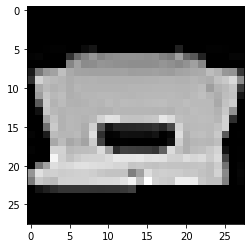

In [ ]:
# ลอง plot ดู
import matplotlib.pyplot as plt
%matplotlib inline

# Sample n to plot
sample = 999
image = training_image[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

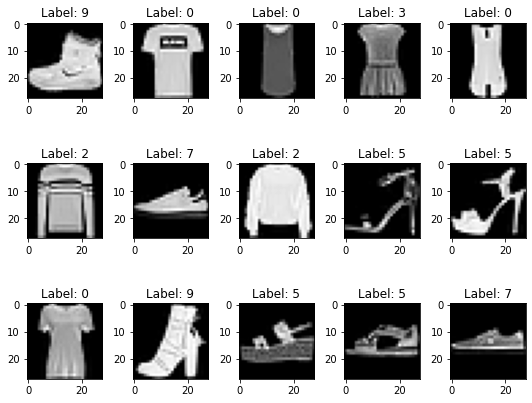

In [ ]:
# multiple images plot
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row * num_col
images = training_images[:num]
labels = training_labels[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2 * num_row))

for i in range(num_row * num_col):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(images[i], cmap='gray')
  ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
# image 0 - 255
# label 0 - 9

# Normalize 0 - 1.
training_image = training_image/255
test_images = test_images / 255


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),                        #นี่คือ input layer , Flatten คือ 2D arrat -> 1D array
                                    tf.keras.layers.Dense(500, activation= tf.nn.relu),                   #layer of neurons (hidden layers)  128 สุ่มมา  ถ้ามากไป ก็จะช้า
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                   #output layers 
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_image,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8653 - accuracy: 0.7157
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5448 - accuracy: 0.8046
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4859 - accuracy: 0.8281
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4549 - accuracy: 0.8392
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4338 - accuracy: 0.8467


In [ ]:
classifications = model.predict(test_images)

In [ ]:
print(classifications[999])

[5.4222750e-07 4.8768882e-08 1.3488783e-07 4.8444583e-08 4.1321933e-08
 5.7756159e-05 2.0688373e-07 9.9992430e-01 9.7815227e-06 7.1113172e-06]


In [ ]:
print(test_labels[999])

7
